In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
%matplotlib inline

In [2]:
mydata = pd.read_csv('NY property data.csv')

In [11]:
mydata.shape

(1070994, 32)

### Calculate basic summary for numeric fields

In [12]:
summary = mydata.describe().transpose()
summary

,count,mean,std,min,25%,50%,75%,max
RECORD,1070994.0,535497.500000,3.091695e+05,1.0,267749.25,535497.5,803245.75,1.070994e+06
B,1070994.0,3.215427,1.201197e+00,1.0,3.00,3.0,4.00,5.000000e+00
BLOCK,1070994.0,4757.239213,3.676579e+03,1.0,1555.00,4047.0,6898.00,1.635000e+04
LOT,1070994.0,364.722117,8.532152e+02,1.0,23.00,49.0,143.00,9.978000e+03
LTFRONT,1070994.0,36.635301,7.403284e+01,0.0,19.00,25.0,40.00,9.999000e+03
LTDEPTH,1070994.0,88.861594,7.639628e+01,0.0,80.00,100.0,100.00,9.999000e+03
STORIES,1014730.0,5.006918,8.365707e+00,1.0,2.00,2.0,3.00,1.190000e+02
FULLVAL,1070994.0,874264.505434,1.158243e+07,0.0,304000.00,447000.0,619000.00,6.150000e+09
AVLAND,1070994.0,85067.918672,4.057260e+06,0.0,9180.00,13678.0,19740.00,2.668500e+09
AVTOT,1070994.0,227238.168711,6.877529e+06,0.0,18374.00,25340.0,45438.00,4.668309e+09


In [13]:
numrecords = len(mydata)
print(numrecords)

1070994


In [14]:
mydata.dtypes

RECORD        int64
BBLE         object
B             int64
BLOCK         int64
LOT           int64
EASEMENT     object
OWNER        object
BLDGCL       object
TAXCLASS     object
LTFRONT       int64
LTDEPTH       int64
EXT          object
STORIES     float64
FULLVAL     float64
AVLAND      float64
AVTOT       float64
EXLAND      float64
EXTOT       float64
EXCD1       float64
STADDR       object
ZIP         float64
EXMPTCL      object
BLDFRONT      int64
BLDDEPTH      int64
AVLAND2     float64
AVTOT2      float64
EXLAND2     float64
EXTOT2      float64
EXCD2       float64
PERIOD       object
YEAR         object
VALTYPE      object
dtype: object

In [15]:
mydata.head().transpose()

,0,1,2,3,4
RECORD,1,2,3,4,5
BBLE,1000010101,1000010201,1000020001,1000020023,1000030001
B,1,1,1,1,1
BLOCK,1,1,2,2,3
LOT,101,201,1,23,1
EASEMENT,NaN,NaN,NaN,NaN,NaN
OWNER,U S GOVT LAND & BLDGS,U S GOVT LAND & BLDGS,DEPT OF GENERAL SERVI,DEPARTMENT OF BUSINES,PARKS AND RECREATION
BLDGCL,P7,Z9,Y7,T2,Q1
TAXCLASS,4,4,4,4,4
LTFRONT,500,27,709,793,323


In [16]:
mydata['EXCD2'].unique()

array([  nan, 1101., 1017., 5116., 6800., 1015., 1920., 1019., 1021.,
       1504., 5129., 5112., 5110., 3410., 1985., 1602., 7160., 1523.,
       1404., 1603., 1200., 2280., 5108., 5109., 3390., 1850., 1521.,
       1605., 2152., 1401., 1505., 1604., 1022., 1986., 1501., 2151.,
       5104., 5130., 2132., 2231., 1522., 2310., 2201., 2202., 5114.,
       1102., 1891., 5101., 5111., 2262., 1402., 5113., 2134., 1011.,
       2500., 2350., 4500., 1023., 1930., 2232., 6320.])

In [17]:
mydata.count()

RECORD      1070994
BBLE        1070994
B           1070994
BLOCK       1070994
LOT         1070994
EASEMENT       4636
OWNER       1039249
BLDGCL      1070994
TAXCLASS    1070994
LTFRONT     1070994
LTDEPTH     1070994
EXT          354305
STORIES     1014730
FULLVAL     1070994
AVLAND      1070994
AVTOT       1070994
EXLAND      1070994
EXTOT       1070994
EXCD1        638488
STADDR      1070318
ZIP         1041104
EXMPTCL       15579
BLDFRONT    1070994
BLDDEPTH    1070994
AVLAND2      282726
AVTOT2       282732
EXLAND2       87449
EXTOT2       130828
EXCD2         92948
PERIOD      1070994
YEAR        1070994
VALTYPE     1070994
dtype: int64

### Count unique values for each column

In [18]:
column = mydata.columns
for i in column:
    unique = mydata[i].unique()
    count = len(unique)
    summary.loc[i,'unique_val'] = count
    
summary

,count,mean,std,min,25%,50%,75%,max,unique_val
RECORD,1070994.0,535497.500000,3.091695e+05,1.0,267749.25,535497.5,803245.75,1.070994e+06,1070994.0
B,1070994.0,3.215427,1.201197e+00,1.0,3.00,3.0,4.00,5.000000e+00,5.0
BLOCK,1070994.0,4757.239213,3.676579e+03,1.0,1555.00,4047.0,6898.00,1.635000e+04,13984.0
LOT,1070994.0,364.722117,8.532152e+02,1.0,23.00,49.0,143.00,9.978000e+03,6366.0
LTFRONT,1070994.0,36.635301,7.403284e+01,0.0,19.00,25.0,40.00,9.999000e+03,1297.0
LTDEPTH,1070994.0,88.861594,7.639628e+01,0.0,80.00,100.0,100.00,9.999000e+03,1370.0
STORIES,1014730.0,5.006918,8.365707e+00,1.0,2.00,2.0,3.00,1.190000e+02,112.0
FULLVAL,1070994.0,874264.505434,1.158243e+07,0.0,304000.00,447000.0,619000.00,6.150000e+09,109324.0
AVLAND,1070994.0,85067.918672,4.057260e+06,0.0,9180.00,13678.0,19740.00,2.668500e+09,70921.0
AVTOT,1070994.0,227238.168711,6.877529e+06,0.0,18374.00,25340.0,45438.00,4.668309e+09,112914.0


### Count zero for each column

In [19]:
column = mydata.columns
for i in column:
    zero = mydata[mydata[i] == 0]
    count = len(zero)
    summary.loc[i,'zero'] = count
    
summary

,count,mean,std,min,25%,50%,75%,max,unique_val,zero
RECORD,1070994.0,535497.500000,3.091695e+05,1.0,267749.25,535497.5,803245.75,1.070994e+06,1070994.0,0.0
B,1070994.0,3.215427,1.201197e+00,1.0,3.00,3.0,4.00,5.000000e+00,5.0,0.0
BLOCK,1070994.0,4757.239213,3.676579e+03,1.0,1555.00,4047.0,6898.00,1.635000e+04,13984.0,0.0
LOT,1070994.0,364.722117,8.532152e+02,1.0,23.00,49.0,143.00,9.978000e+03,6366.0,0.0
LTFRONT,1070994.0,36.635301,7.403284e+01,0.0,19.00,25.0,40.00,9.999000e+03,1297.0,169108.0
LTDEPTH,1070994.0,88.861594,7.639628e+01,0.0,80.00,100.0,100.00,9.999000e+03,1370.0,170128.0
STORIES,1014730.0,5.006918,8.365707e+00,1.0,2.00,2.0,3.00,1.190000e+02,112.0,0.0
FULLVAL,1070994.0,874264.505434,1.158243e+07,0.0,304000.00,447000.0,619000.00,6.150000e+09,109324.0,13007.0
AVLAND,1070994.0,85067.918672,4.057260e+06,0.0,9180.00,13678.0,19740.00,2.668500e+09,70921.0,13009.0
AVTOT,1070994.0,227238.168711,6.877529e+06,0.0,18374.00,25340.0,45438.00,4.668309e+09,112914.0,13007.0


In [20]:
summary.to_csv('summary.csv')

### Find the most common field for categorical fields 

In [21]:
mydata.groupby('BBLE').count().sort_values(by = 'RECORD', ascending = False).head()

,RECORD,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
BBLE,,,,,,,,,,,,,,,,,,,,,
1000010101,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
4050107032,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,0,0,0,1,1,1
4050107034,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,0,0,0,1,1,1
4050107035,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,0,0,0,1,1,1
4050107036,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,0,0,0,1,1,1


In [22]:
mydata.groupby('B').count().sort_values(by = 'RECORD', ascending = False)

,RECORD,BBLE,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
B,,,,,,,,,,,,,,,,,,,,,
4,358046,358046,358046,358046,762,352123,358046,358046,358046,358046,...,358046,358046,51638,51638,16623,21015,35969,358046,358046,358046
3,323243,323243,323243,323243,850,311818,323243,323243,323243,323243,...,323243,323243,65278,65278,23153,31131,26682,323243,323243,323243
1,146220,146220,146220,146220,366,136199,146220,146220,146220,146220,...,146220,146220,123716,123716,36904,55049,3692,146220,146220,146220
5,136200,136200,136200,136200,2163,133277,136200,136200,136200,136200,...,136200,136200,10513,10519,3719,4319,16118,136200,136200,136200
2,107285,107285,107285,107285,495,105832,107285,107285,107285,107285,...,107285,107285,31581,31581,7050,19314,10487,107285,107285,107285


In [23]:
mydata.groupby('BLOCK').count().sort_values(by = 'RECORD', ascending = False).head()

,RECORD,BBLE,B,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
BLOCK,,,,,,,,,,,,,,,,,,,,,
3944,3888,3888,3888,3888,0,3888,3888,3888,3888,3888,...,3888,3888,3859,3859,778,3857,780,3888,3888,3888
16,3786,3786,3786,3786,0,2908,3786,3786,3786,3786,...,3786,3786,3728,3728,3523,3704,4,3786,3786,3786
3943,3424,3424,3424,3424,0,3420,3424,3424,3424,3424,...,3424,3424,3389,3389,324,3377,325,3424,3424,3424
3938,2794,2794,2794,2794,0,2793,2794,2794,2794,2794,...,2794,2794,2723,2723,319,2660,327,2794,2794,2794
1171,2535,2535,2535,2535,3,2346,2535,2535,2535,2535,...,2535,2535,2446,2446,442,1969,23,2535,2535,2535


In [24]:
mydata.groupby('LOT').count().sort_values(by = 'RECORD', ascending = False).head()

,RECORD,BBLE,B,BLOCK,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
LOT,,,,,,,,,,,,,,,,,,,,,
1,24367,24367,24367,24367,493,24301,24367,24367,24367,24367,...,24367,24367,9623,9623,3575,4351,1944,24367,24367,24367
20,12294,12294,12294,12294,60,12222,12294,12294,12294,12294,...,12294,12294,1668,1668,448,551,1223,12294,12294,12294
15,12171,12171,12171,12171,49,12114,12171,12171,12171,12171,...,12171,12171,1565,1565,357,464,1208,12171,12171,12171
12,12143,12143,12143,12143,51,12095,12143,12143,12143,12143,...,12143,12143,1655,1655,389,486,1183,12143,12143,12143
14,12074,12074,12074,12074,39,12015,12074,12074,12074,12074,...,12074,12074,1533,1533,381,460,1223,12074,12074,12074


In [25]:
mydata.groupby('EASEMENT').count().sort_values(by = 'RECORD', ascending = False).head()

,RECORD,BBLE,B,BLOCK,LOT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
EASEMENT,,,,,,,,,,,,,,,,,,,,,
E,4148,4148,4148,4148,4148,3254,4148,4148,4148,4148,...,4148,4148,1279,1279,1219,1219,0,4148,4148,4148
F,296,296,296,296,296,258,296,296,296,296,...,296,296,84,84,67,67,0,296,296,296
G,102,102,102,102,102,89,102,102,102,102,...,102,102,30,30,23,23,0,102,102,102
H,33,33,33,33,33,28,33,33,33,33,...,33,33,11,11,7,7,0,33,33,33
N,19,19,19,19,19,18,19,19,19,19,...,19,19,10,10,10,10,0,19,19,19


In [26]:
mydata.groupby('OWNER').count().sort_values(by = 'RECORD', ascending = False).head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
OWNER,,,,,,,,,,,,,,,,,,,,,
PARKCHESTER PRESERVAT,6021,6021,6021,6021,6021,0,6021,6021,6021,6021,...,6021,6021,6021,6021,7,5933,7,6021,6021,6021
PARKS AND RECREATION,4255,4255,4255,4255,4255,0,4255,4255,4255,4255,...,4255,4255,2293,2293,1628,1628,2,4255,4255,4255
DCAS,2169,2169,2169,2169,2169,3,2169,2169,2169,2169,...,2169,2169,616,616,179,181,0,2169,2169,2169
HOUSING PRESERVATION,1904,1904,1904,1904,1904,0,1904,1904,1904,1904,...,1904,1904,958,958,269,271,1,1904,1904,1904
CITY OF NEW YORK,1450,1450,1450,1450,1450,888,1450,1450,1450,1450,...,1450,1450,608,608,502,507,9,1450,1450,1450


In [27]:
mydata.groupby('BLDGCL').count().sort_values(by = 'RECORD', ascending = False).head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,TAXCLASS,LTFRONT,LTDEPTH,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
BLDGCL,,,,,,,,,,,,,,,,,,,,,
R4,139879,139879,139879,139879,139879,0,126663,139879,139879,139879,...,139879,139879,138181,138181,49918,81273,4513,139879,139879,139879
A1,123369,123369,123369,123369,123369,0,123198,123369,123369,123369,...,123369,123369,0,0,0,0,15991,123369,123369,123369
A5,96984,96984,96984,96984,96984,0,96522,96984,96984,96984,...,96984,96984,0,0,0,0,13374,96984,96984,96984
B1,84208,84208,84208,84208,84208,0,83696,84208,84208,84208,...,84208,84208,0,0,0,0,10407,84208,84208,84208
B2,77598,77598,77598,77598,77598,0,76984,77598,77598,77598,...,77598,77598,0,0,0,0,9485,77598,77598,77598


In [28]:
mydata.groupby('TAXCLASS').count().sort_values(by = 'RECORD', ascending = False).head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,LTFRONT,LTDEPTH,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
TAXCLASS,,,,,,,,,,,,,,,,,,,,,
1,660721,660721,660721,660721,660721,1,657699,660721,660721,660721,...,660721,660721,0,0,0,0,81315,660721,660721,660721
2,188612,188612,188612,188612,188612,1,169798,188612,188612,188612,...,188612,188612,180493,180493,64011,98829,8149,188612,188612,188612
4,104310,104310,104310,104310,104310,2089,98062,104310,104310,104310,...,104310,104310,102233,102239,23438,31999,504,104310,104310,104310
2A,40574,40574,40574,40574,40574,0,40463,40574,40574,40574,...,40574,40574,0,0,0,0,992,40574,40574,40574
1B,24738,24738,24738,24738,24738,226,23754,24738,24738,24738,...,24738,24738,0,0,0,0,1,24738,24738,24738


In [29]:
mydata.groupby('EXT').count().sort_values(by = 'RECORD', ascending = False).head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
EXT,,,,,,,,,,,,,,,,,,,,,
G,266970,266970,266970,266970,266970,0,266782,266970,266970,266970,...,266970,266970,2934,2934,1014,1156,35611,266970,266970,266970
E,49442,49442,49442,49442,49442,0,49276,49442,49442,49442,...,49442,49442,10836,10836,2009,2608,3557,49442,49442,49442
EG,37893,37893,37893,37893,37893,0,37867,37893,37893,37893,...,37893,37893,1545,1545,348,385,4483,37893,37893,37893


In [ ]:
mydata.groupby('STADDR').count().sort_values(by = 'RECORD', ascending = False).head()

In [ ]:
mydata.groupby('ZIP').count().sort_values(by = 'RECORD', ascending = False).head()

In [ ]:
mydata.groupby('EXMPTCL').count().sort_values(by = 'RECORD', ascending = False).head()

In [ ]:
mydata.groupby('PERIOD').count().sort_values(by = 'RECORD', ascending = False).head()

In [ ]:
mydata.groupby('YEAR').count().sort_values(by = 'RECORD', ascending = False).head()

In [ ]:
mydata.groupby('VALTYPE').count().sort_values(by = 'RECORD', ascending = False).head()

## Step by Step Description

In [3]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

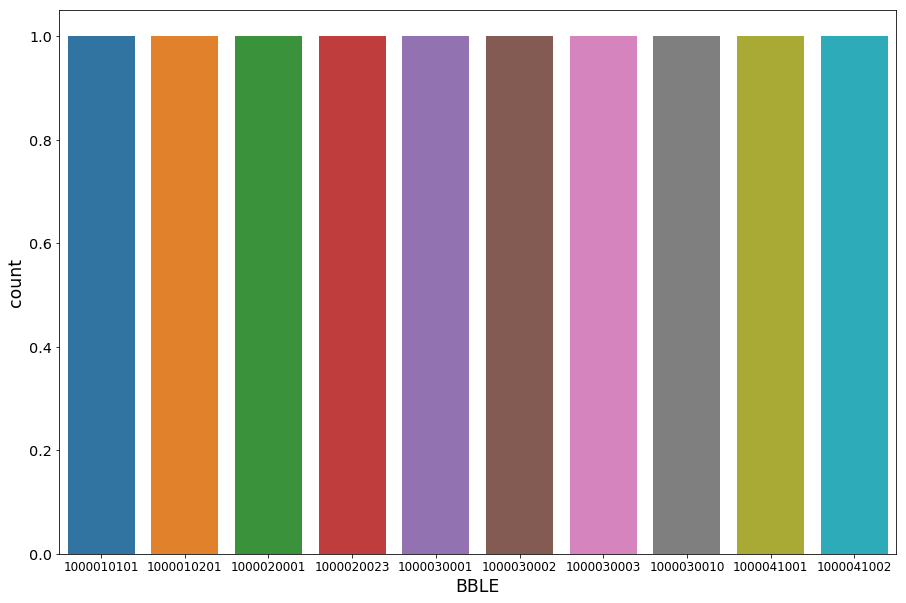

In [9]:
bble = mydata[["BBLE"]].head(10)
plot = sns.countplot(x='BBLE', data = bble)
plt.savefig('02BBLE.png',bbox_inches='tight')
plt.show()

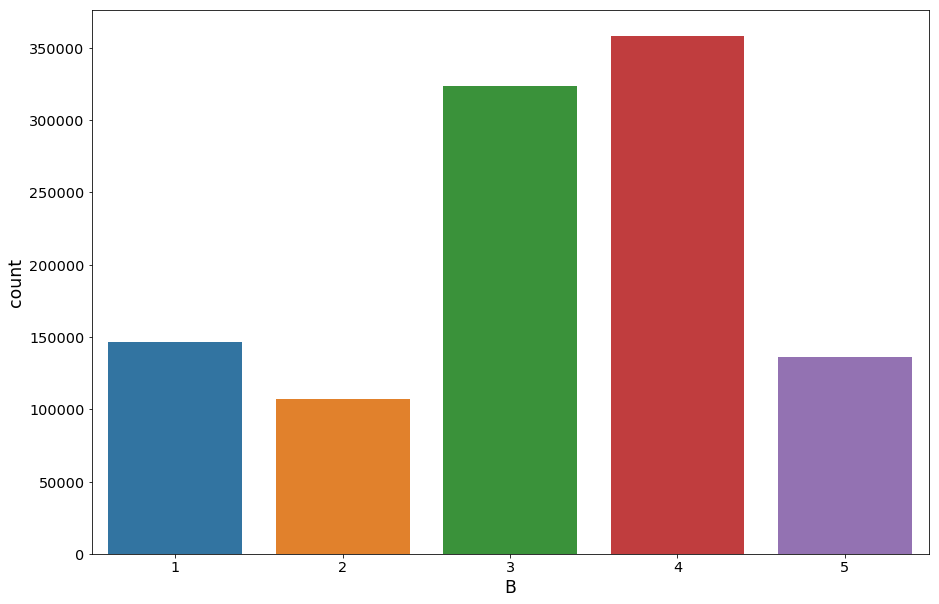

In [5]:
plot = sns.countplot(x='B', data = mydata)
plt.savefig('03B.png',bbox_inches='tight')
plt.show()

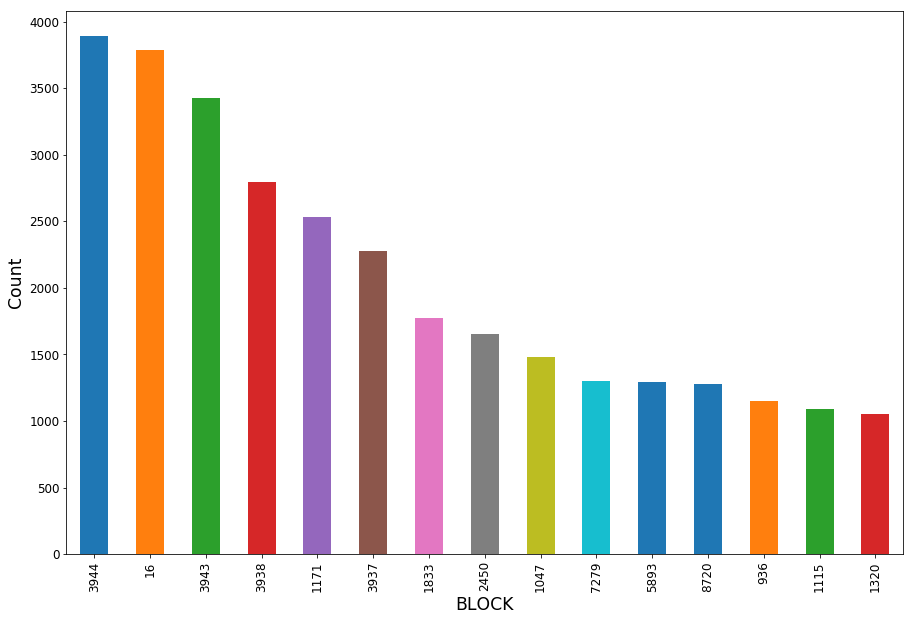

In [198]:
mydata['BLOCK'].value_counts().head(15).plot(kind = 'bar')
plt.xlabel('BLOCK')
plt.ylabel('Count')
plt.savefig('04BLOCK.png',bbox_inches='tight')
plt.show()

In [6]:
mydata['LOT'].value_counts().head(15)

1     24367
20    12294
15    12171
12    12143
14    12074
16    12042
17    11982
18    11979
25    11949
21    11840
23    11705
22    11665
6     11646
19    11640
30    11596
Name: LOT, dtype: int64

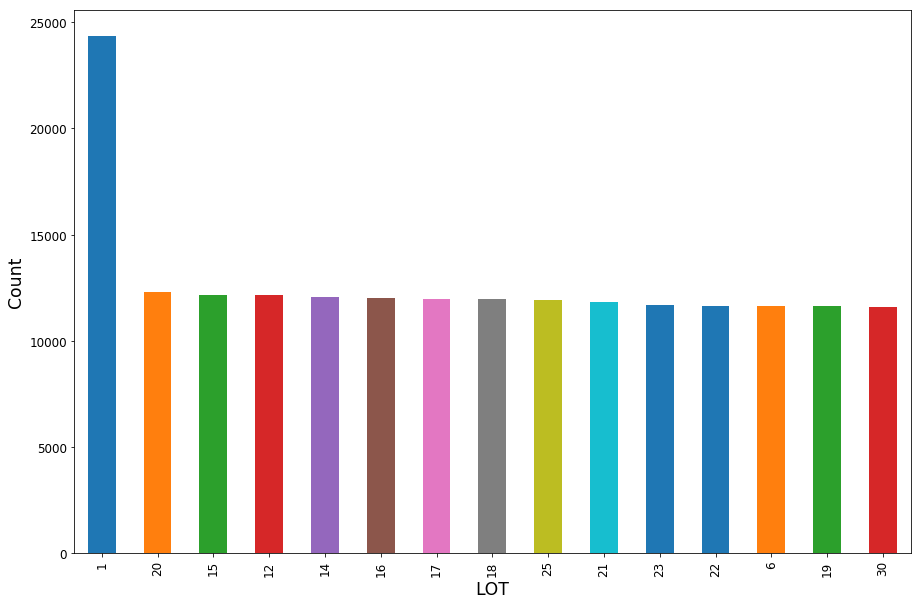

In [199]:
mydata['LOT'].value_counts().head(15).plot(kind = 'bar')
plt.xlabel('LOT')
plt.ylabel('Count')
plt.savefig('05LOT.png',bbox_inches='tight')
plt.show()

In [9]:
mydata['EASEMENT'].value_counts().head(15)

E    4148
F     296
G     102
H      33
N      19
I      16
J       8
K       5
L       3
P       3
M       2
U       1
Name: EASEMENT, dtype: int64

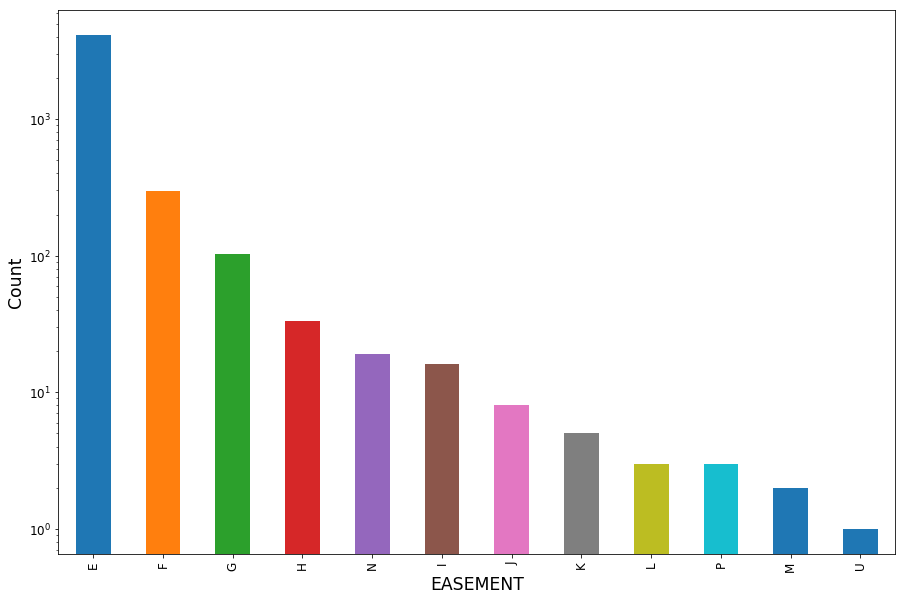

In [19]:
mydata['EASEMENT'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')
plt.xlabel('EASEMENT')
plt.ylabel('Count')
plt.savefig('06EASEMENT.png',bbox_inches='tight')
plt.show()

In [17]:
mydata['OWNER'].value_counts().head(15)

PARKCHESTER PRESERVAT    6021
PARKS AND RECREATION     4255
DCAS                     2169
HOUSING PRESERVATION     1904
CITY OF NEW YORK         1450
DEPT OF ENVIRONMENTAL    1166
BOARD OF EDUCATION       1015
NEW YORK CITY HOUSING    1014
CNY/NYCTA                 975
NYC HOUSING PARTNERSH     747
YORKVILLE TOWERS ASSO     558
DEPARTMENT OF BUSINES     527
DEPT OF TRANSPORTATIO     503
MTA/LIRR                  467
PARCKHESTER PRESERVAT     439
Name: OWNER, dtype: int64

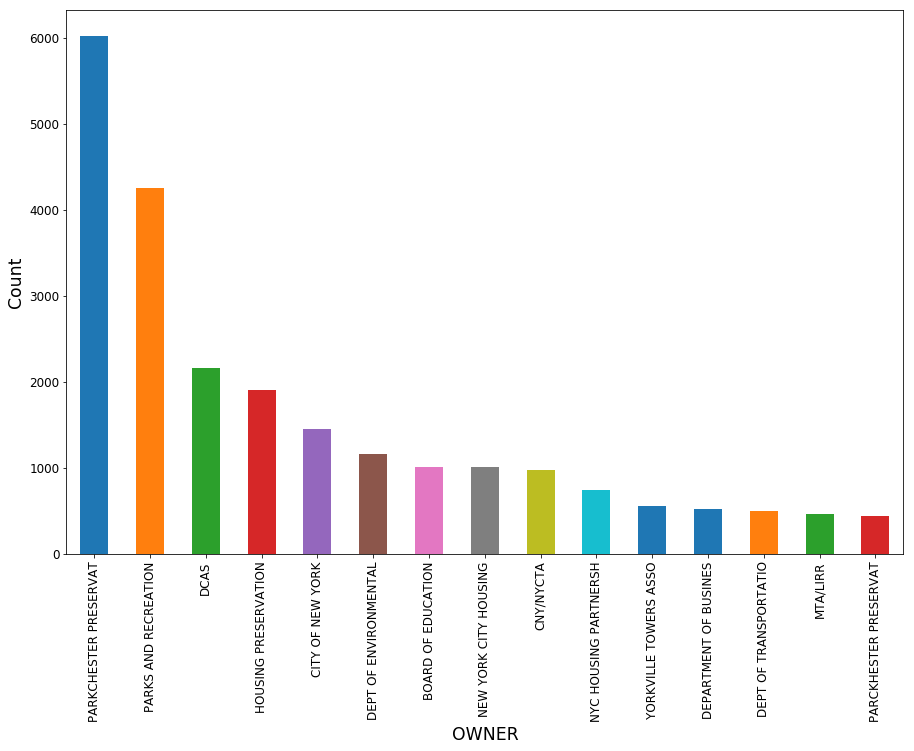

In [21]:
mydata['OWNER'].value_counts().head(15).plot(kind = 'bar')
plt.xlabel('OWNER')
plt.ylabel('Count')
plt.savefig('07OWNER.png',bbox_inches='tight')
plt.show()

In [22]:
mydata['BLDGCL'].value_counts().head(15)

R4    139879
A1    123369
A5     96984
B1     84208
B2     77598
C0     73111
B3     59240
A2     51130
A9     26177
B9     26133
V0     24049
R5     23957
R3     21667
C3     16343
C1     15070
Name: BLDGCL, dtype: int64

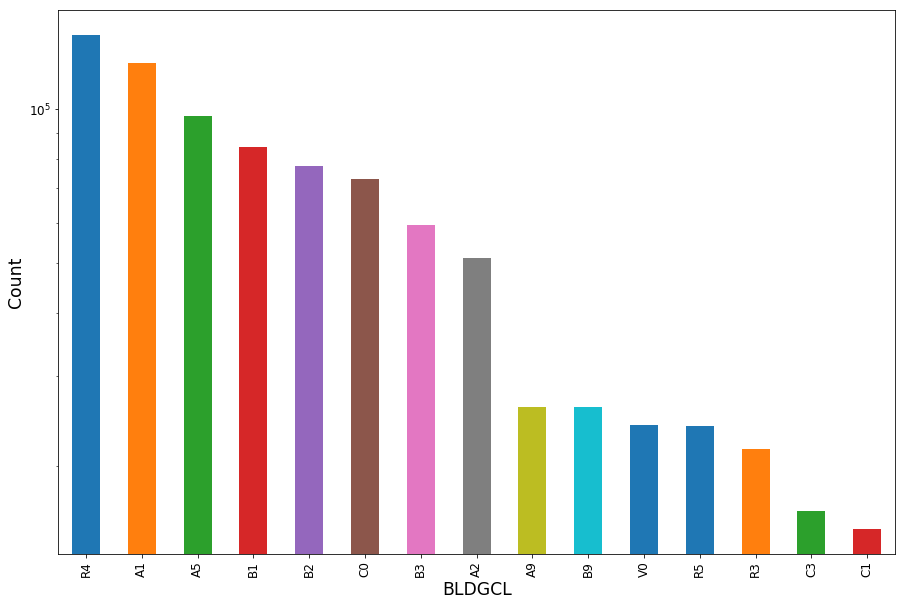

In [23]:
mydata['BLDGCL'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')
plt.xlabel('BLDGCL')
plt.ylabel('Count')
plt.savefig('08BLDGCL.png',bbox_inches='tight')
plt.show()

In [24]:
mydata['TAXCLASS'].value_counts().head(15)

1     660721
2     188612
4     104310
2A     40574
1B     24738
1A     21667
2B     13964
2C     10795
3       4638
1C       946
1D        29
Name: TAXCLASS, dtype: int64

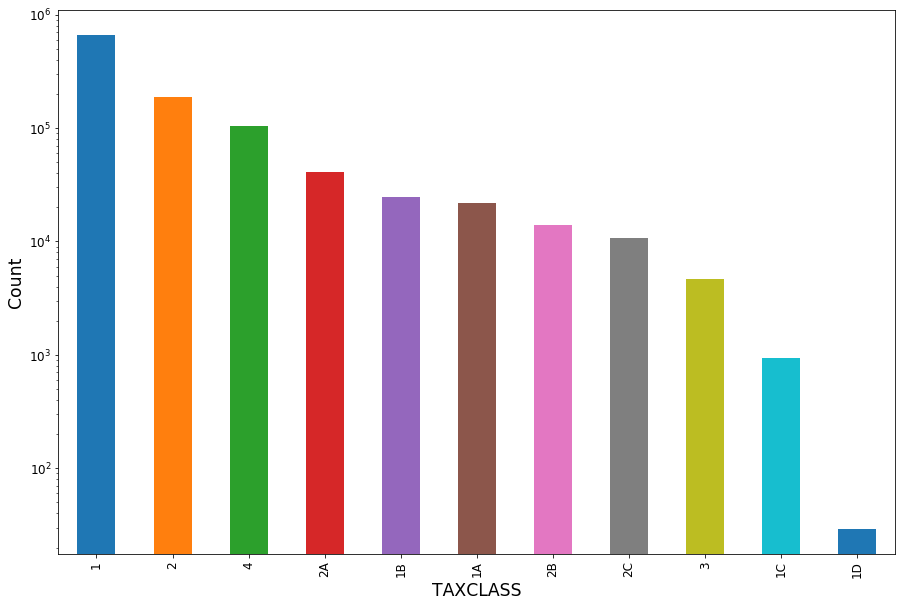

In [4]:
mydata['TAXCLASS'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')
plt.xlabel('TAXCLASS')
plt.ylabel('Count')
plt.savefig('09TAXCLASS.png',bbox_inches='tight')
plt.show()

In [200]:
ltfront = mydata[['LTFRONT','RECORD']].groupby('LTFRONT').count().sort_values('RECORD',ascending = False)
ltfront = ltfront[ltfront.index <= 300]
ltfront.tail()

,RECORD
LTFRONT,
267,20
284,20
297,19
287,18
296,17


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


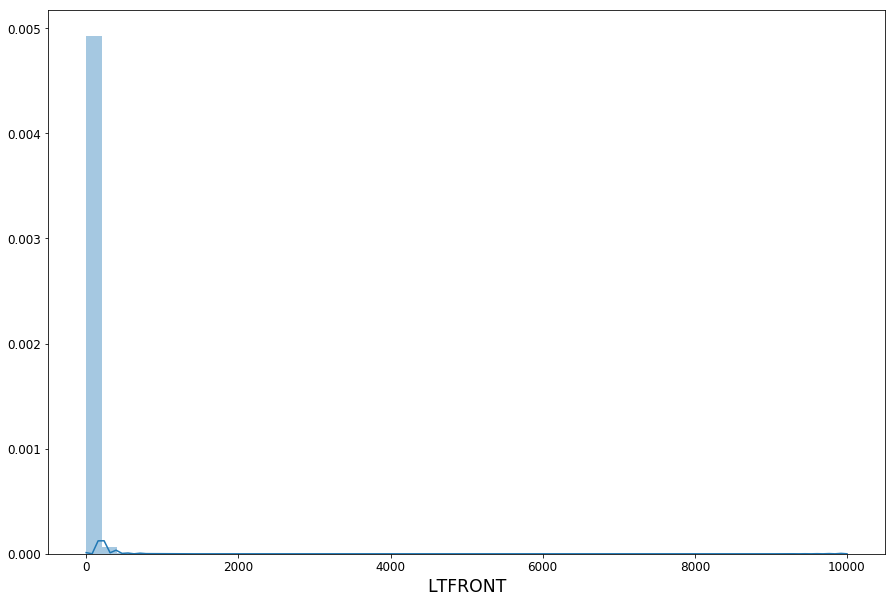

In [75]:
sns.distplot(temp['LTFRONT'])

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


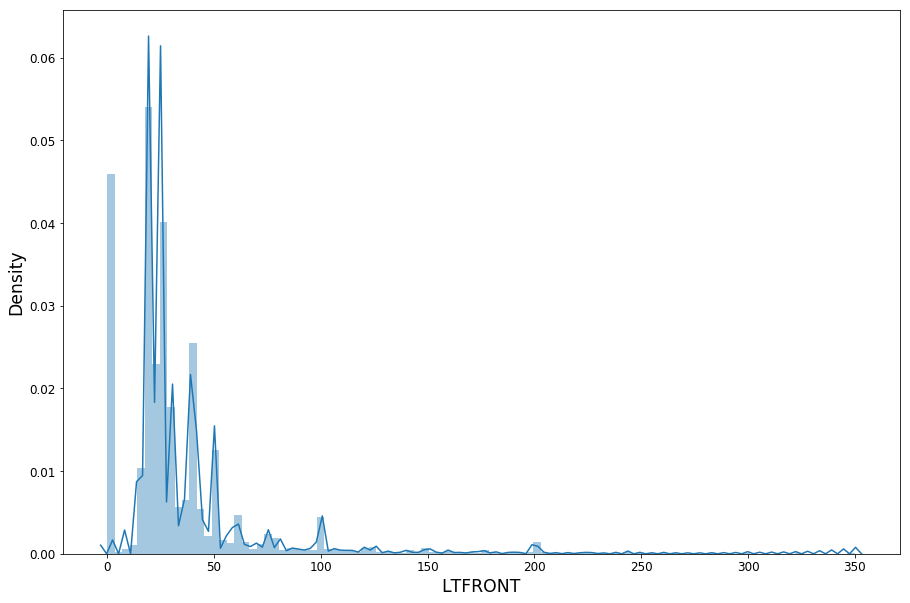

In [46]:
xhigh = 350
temp = mydata[mydata['LTFRONT'] <= xhigh]
sns.distplot(temp['LTFRONT'],bins=100, kde=True)
plt.xlabel('LTFRONT')
plt.ylabel('Density')
plt.savefig('10LTFRONT.png',bbox_inches='tight')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


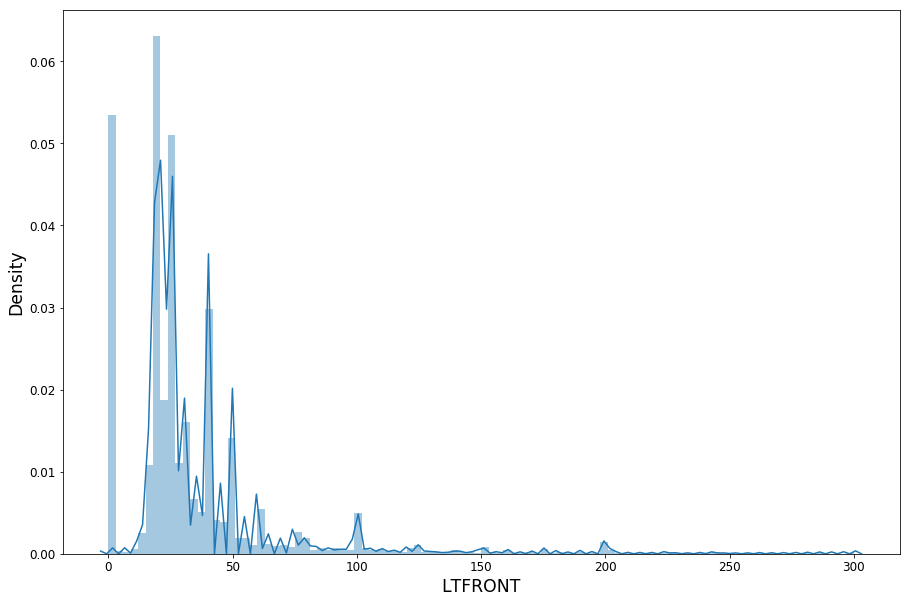

In [47]:
xhigh = 300
temp = mydata[mydata['LTFRONT'] <= xhigh]
sns.distplot(temp['LTFRONT'],bins=100, kde=True)
plt.xlabel('LTFRONT')
plt.ylabel('Density')
plt.savefig('10LTFRONT.png',bbox_inches='tight')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


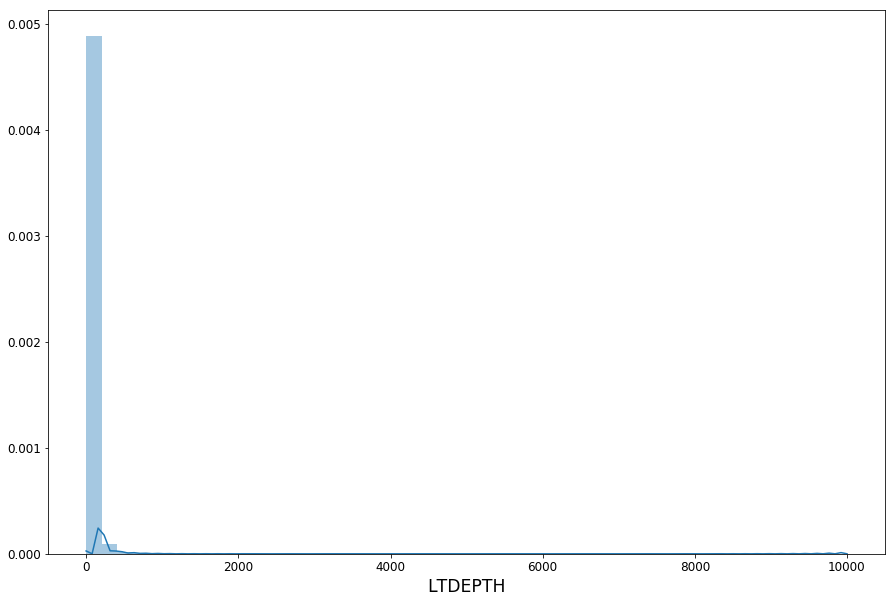

In [48]:
sns.distplot(mydata['LTDEPTH'])

In [72]:
data = mydata[['LTDEPTH','RECORD']].groupby('LTDEPTH').count().sort_values('RECORD',ascending = False)
data = data[data.index <= 350]
data.tail()

,RECORD
LTDEPTH,
337,14
347,13
326,12
342,12
348,12


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


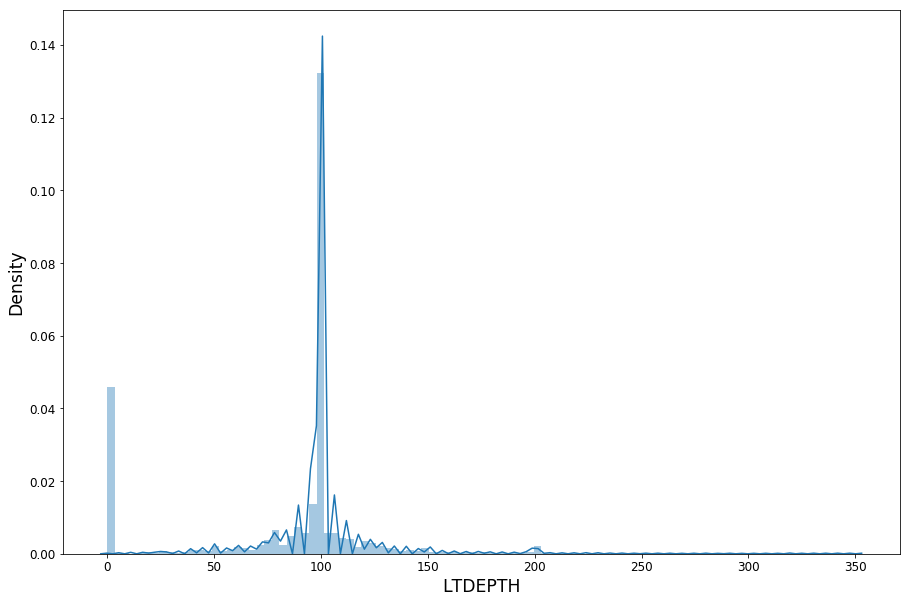

In [73]:
xhigh = 350
temp = mydata[mydata['LTDEPTH'] <= xhigh]
sns.distplot(temp['LTDEPTH'],bins=100, kde=True)
plt.xlabel('LTDEPTH')
plt.ylabel('Density')
plt.savefig('11LTDEPTH.png',bbox_inches='tight')

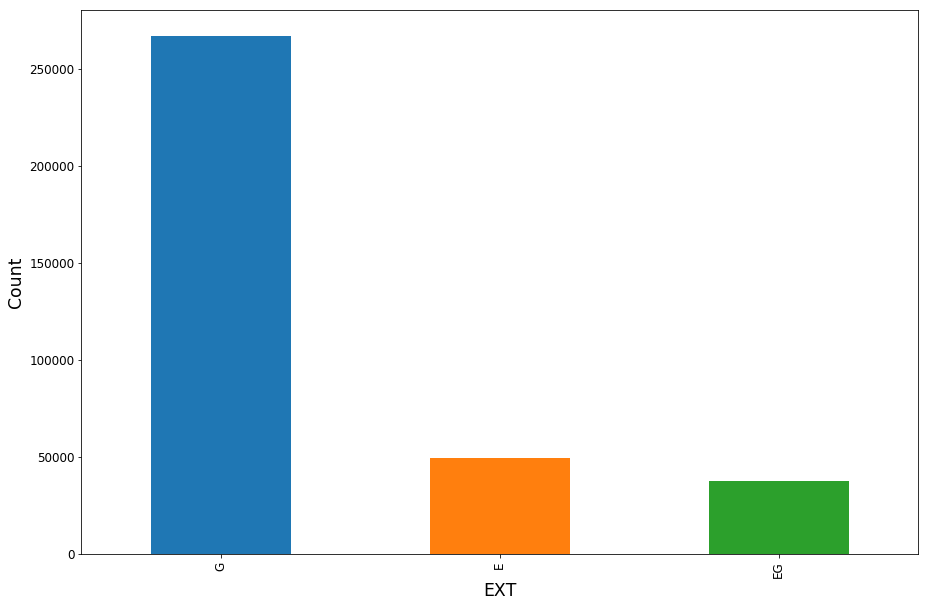

In [76]:
mydata['EXT'].value_counts().head(15).plot(kind = 'bar')
plt.xlabel('EXT')
plt.ylabel('Count')
plt.savefig('12EXT.png',bbox_inches='tight')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


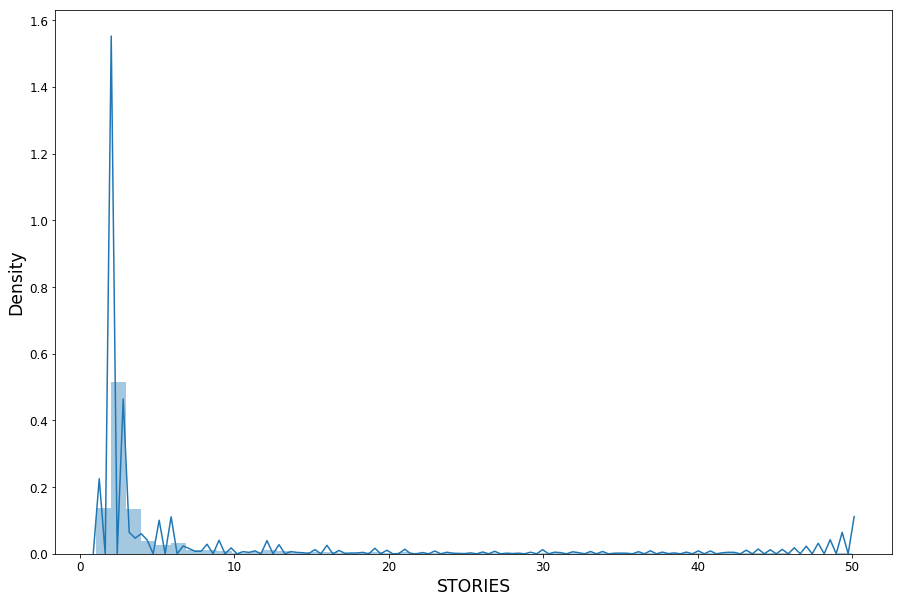

In [98]:
xhigh = 50
temp = mydata[mydata['STORIES'] > 0]
temp.count()
temp = temp[temp['STORIES'] <= xhigh]
sns.distplot(temp['STORIES'],bins=50, kde=True)
plt.xlabel('STORIES')
plt.ylabel('Density')
plt.savefig('13STORIES.png',bbox_inches='tight')

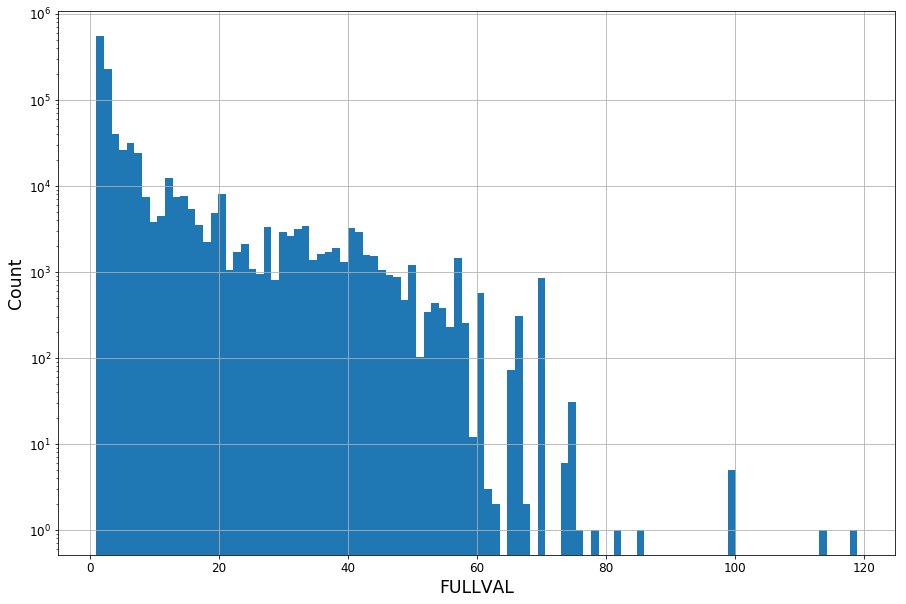

In [92]:
mydata['STORIES'].hist(bins = 100)
plt.yscale('log')
plt.xlabel('FULLVAL')
plt.ylabel('Count')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


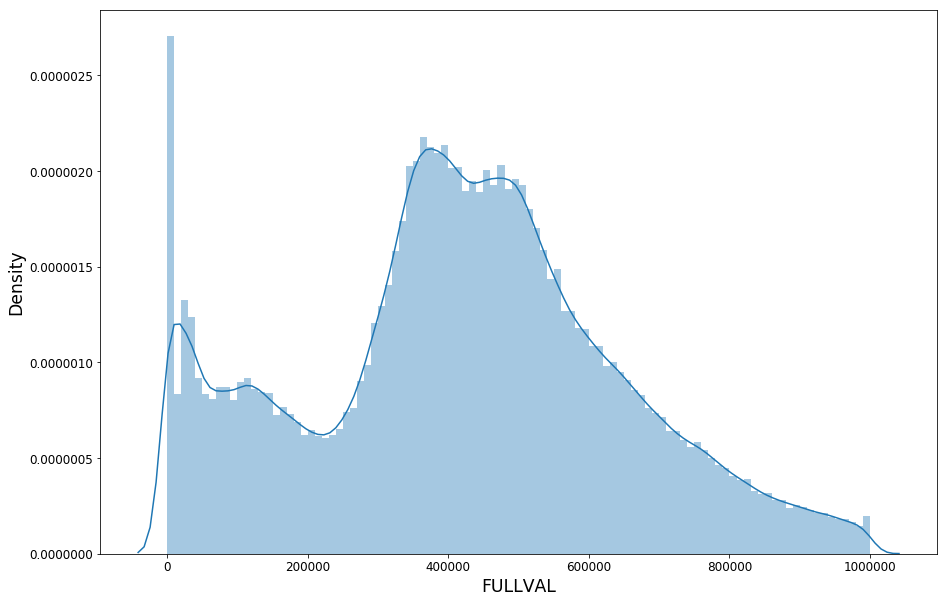

In [111]:
xhigh = 1000000
temp = mydata[mydata['FULLVAL'] <= xhigh]
temp.count()
sns.distplot(temp['FULLVAL'],bins= 100, kde=True)
plt.xlabel('FULLVAL')
plt.ylabel('Density')
plt.savefig('14FULLVAL.png',bbox_inches='tight')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


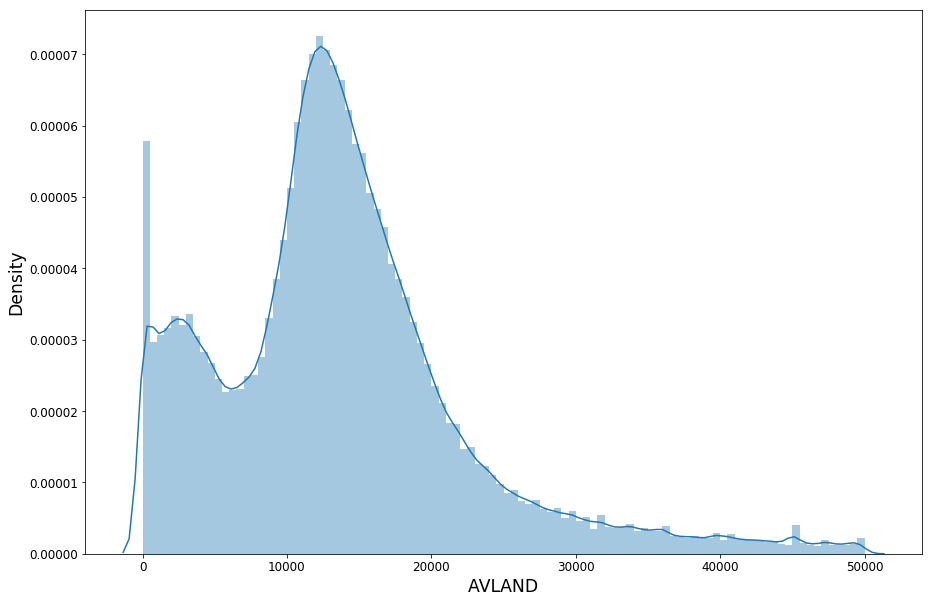

In [120]:
xhigh = 50000
temp = mydata[mydata['AVLAND'] <= xhigh]
temp.count()
sns.distplot(temp['AVLAND'],bins= 100, kde=True)

plt.xlabel('AVLAND')
plt.ylabel('Density')
plt.savefig('15AVLAND.png',bbox_inches='tight')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


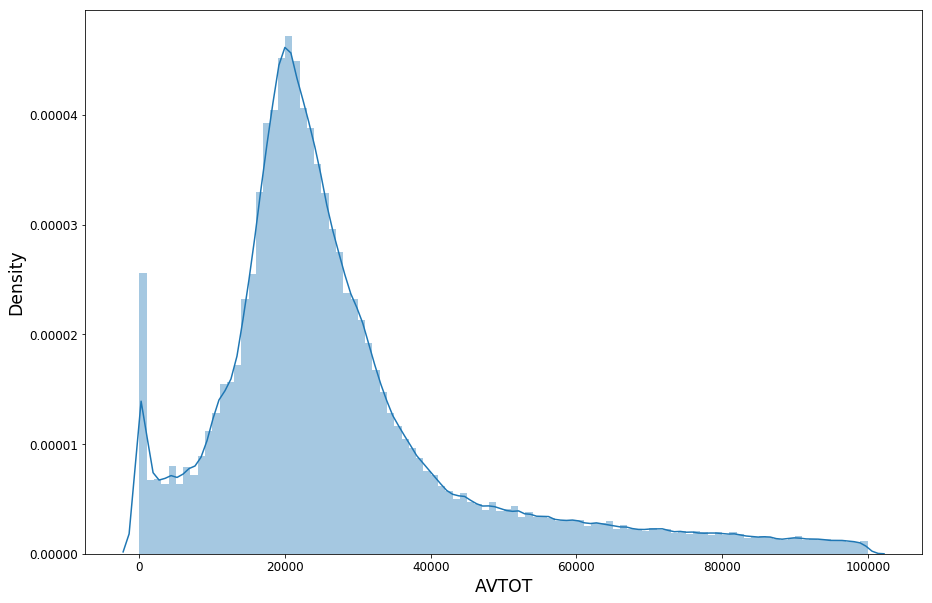

In [134]:
xhigh = 100000
temp = mydata[mydata['AVTOT'] <= xhigh]
temp.count()
sns.distplot(temp['AVTOT'],bins= 100, kde=True)
plt.xlabel('AVTOT')
plt.ylabel('Density')
plt.savefig('16AVTOT.png',bbox_inches='tight')

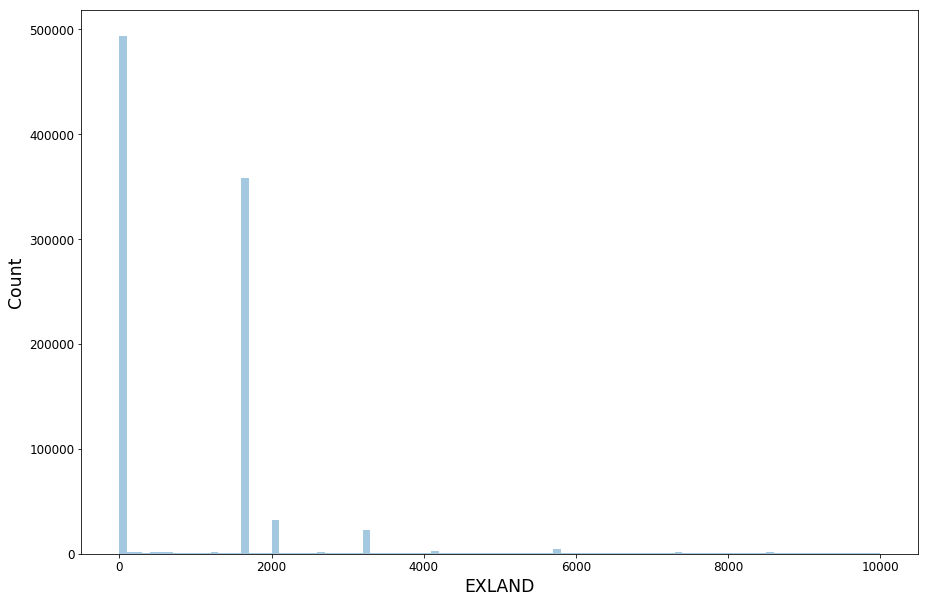

In [139]:
xhigh = 10000
temp = mydata[mydata['EXLAND'] <= xhigh]
temp.count()
sns.distplot(temp['EXLAND'],bins= 100, kde= False)

plt.xlabel('EXLAND')
plt.ylabel('Count')
plt.savefig('17EXLAND.png',bbox_inches='tight')

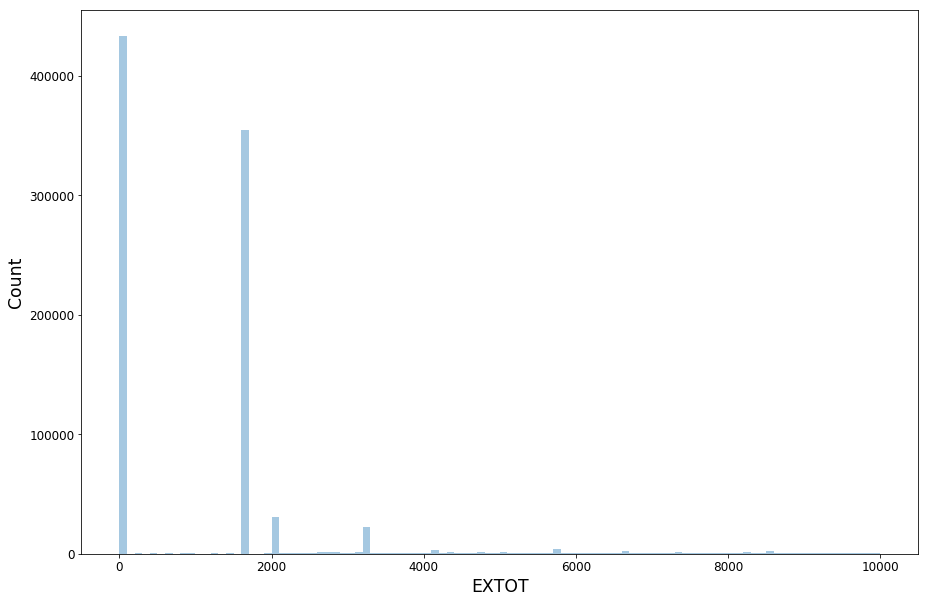

In [138]:
xhigh = 10000
temp = mydata[mydata['EXTOT'] <= xhigh]
temp.count()
sns.distplot(temp['EXTOT'],bins= 100, kde=False)

plt.xlabel('EXTOT')
plt.ylabel('Count')
plt.savefig('18EXTOT.png',bbox_inches='tight')

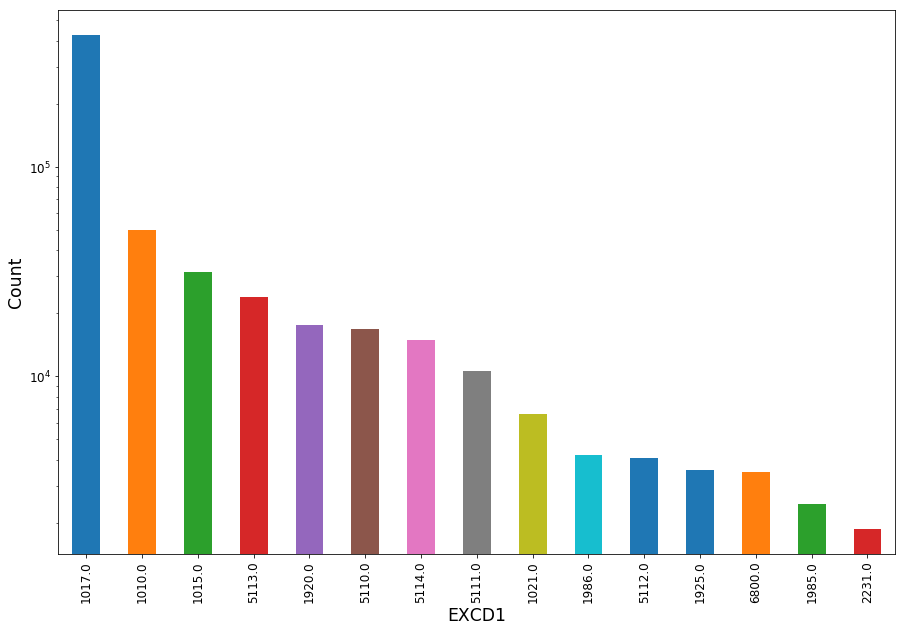

In [204]:
mydata['EXCD1'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')
plt.xlabel('EXCD1')
plt.ylabel('Count')
plt.savefig('19EXCD1.png',bbox_inches='tight')
plt.show()

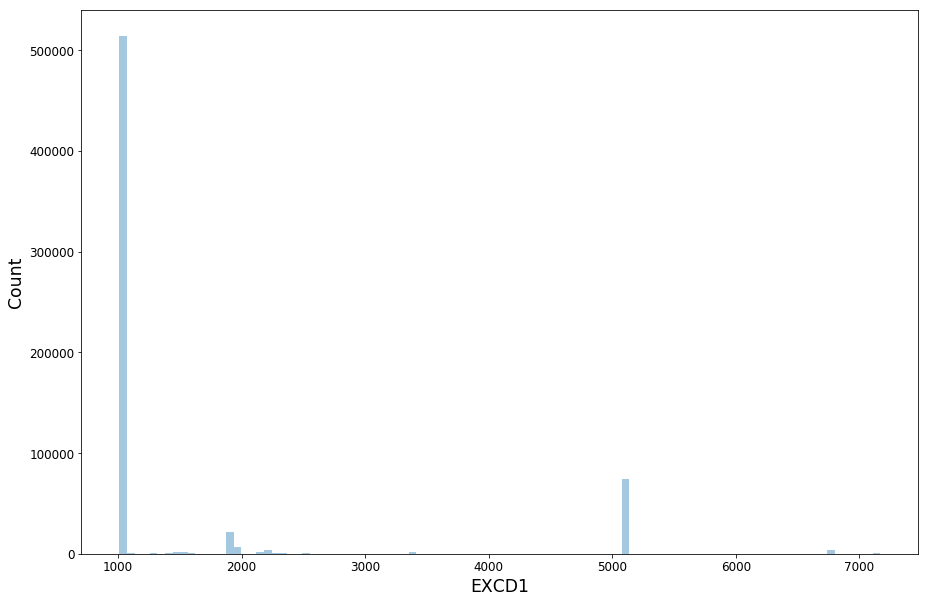

In [149]:
xhigh = 8000
temp = mydata[mydata['EXCD1'] <= xhigh]
temp.count()
sns.distplot(temp['EXCD1'],bins= 100, kde=False)

plt.xlabel('EXCD1')
plt.ylabel('Count')
plt.savefig('19EXCD1.png',bbox_inches='tight')

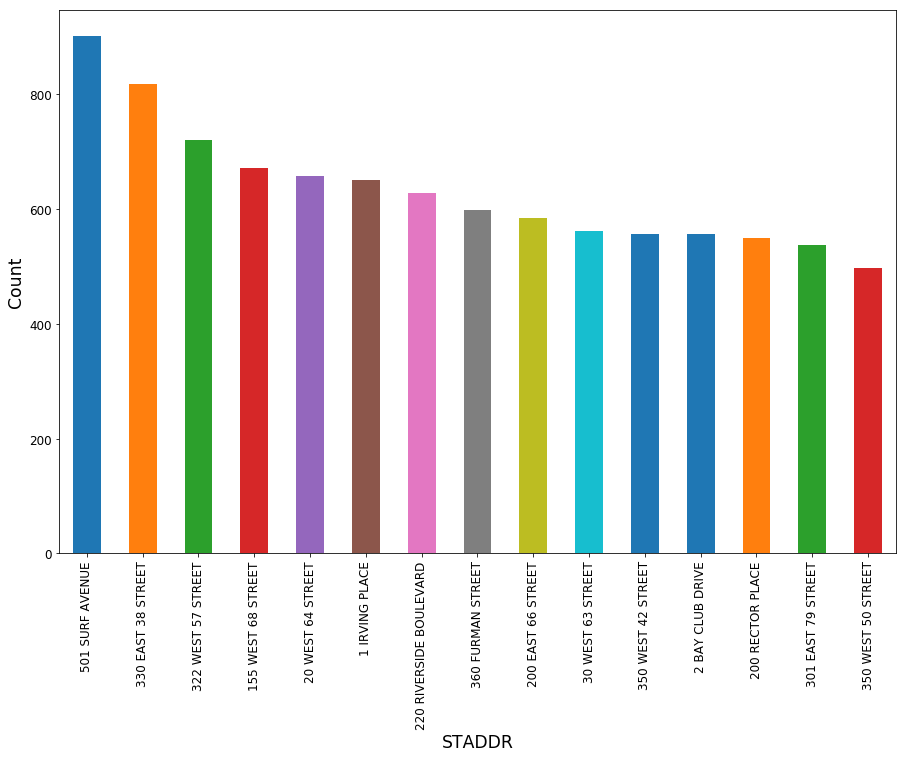

In [141]:
mydata['STADDR'].value_counts().head(15).plot(kind = 'bar')
plt.xlabel('STADDR')
plt.ylabel('Count')
plt.savefig('20STADDR.png',bbox_inches='tight')
plt.show()

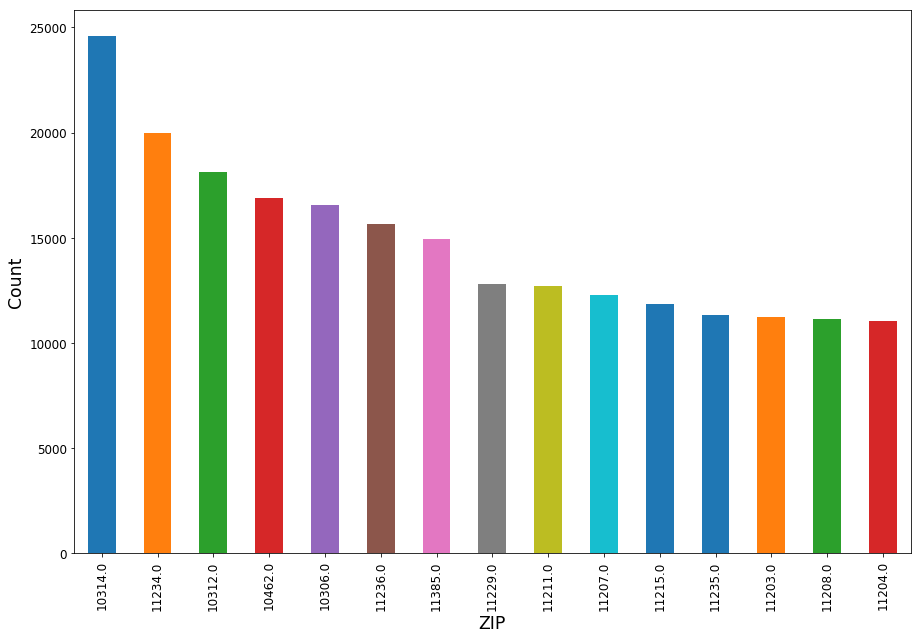

In [142]:
mydata['ZIP'].value_counts().head(15).plot(kind = 'bar')
plt.xlabel('ZIP')
plt.ylabel('Count')
plt.savefig('21ZIP.png',bbox_inches='tight')
plt.show()

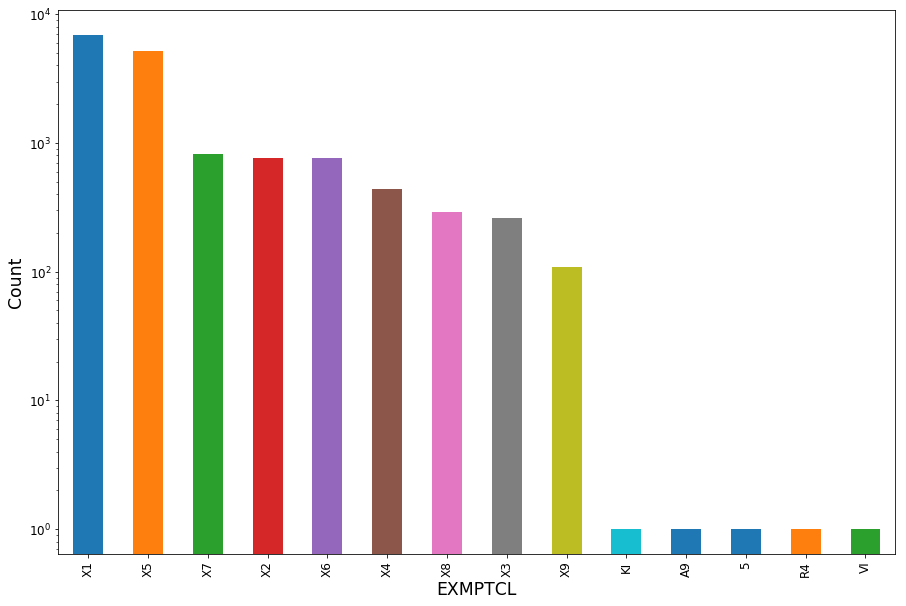

In [146]:
mydata['EXMPTCL'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')
plt.xlabel('EXMPTCL')
plt.ylabel('Count')
plt.savefig('22EXMPTCL.png',bbox_inches='tight')
plt.show()

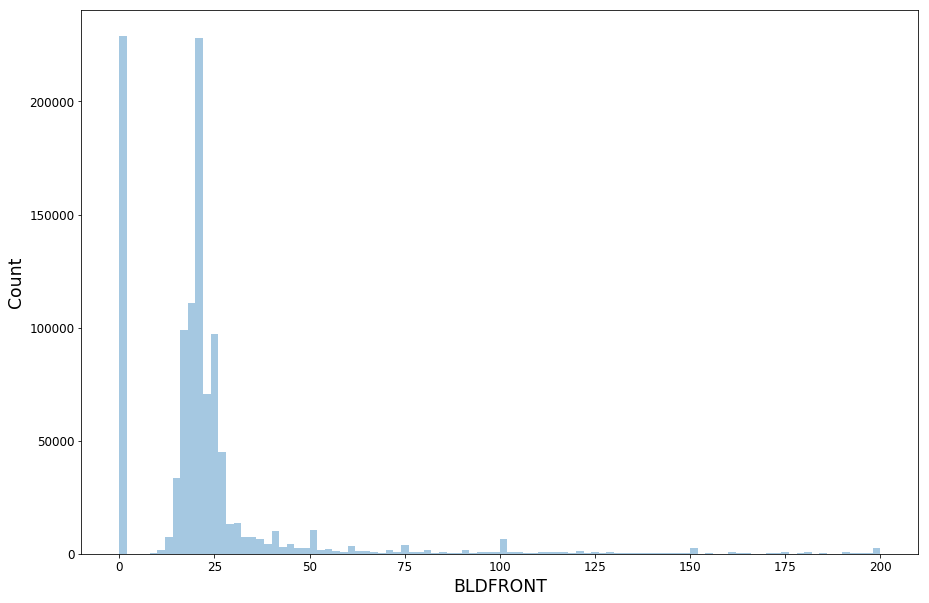

In [150]:
xhigh = 200
temp = mydata[mydata['BLDFRONT'] <= xhigh]
temp.count()
sns.distplot(temp['BLDFRONT'],bins= 100, kde=False)

plt.xlabel('BLDFRONT')
plt.ylabel('Count')
plt.savefig('23BLDFRONT.png',bbox_inches='tight')

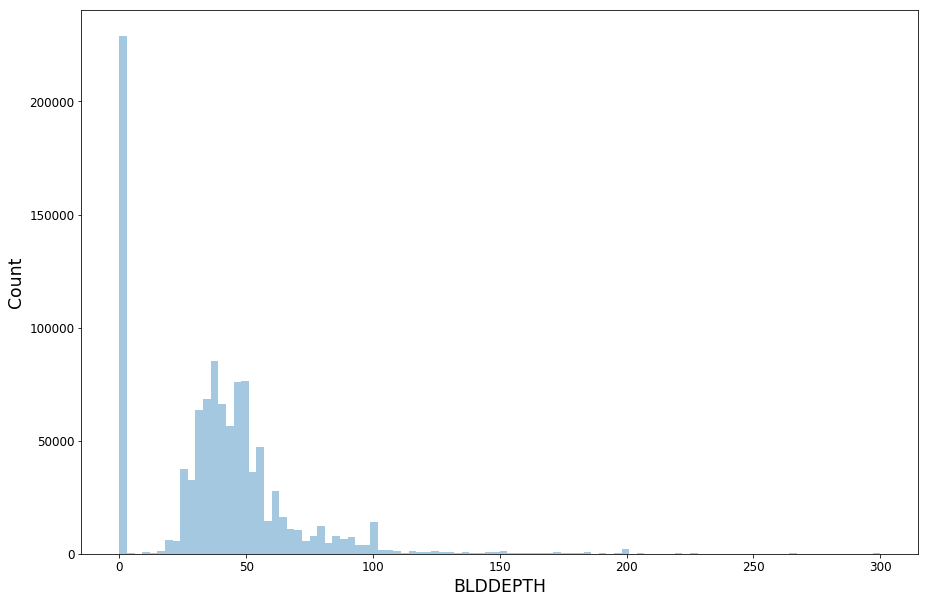

In [153]:
xhigh = 300
temp = mydata[mydata['BLDDEPTH'] <= xhigh]
temp.count()
sns.distplot(temp['BLDDEPTH'],bins= 100, kde=False)

plt.xlabel('BLDDEPTH')
plt.ylabel('Count')
plt.savefig('24BLDDEPTH.png',bbox_inches='tight')

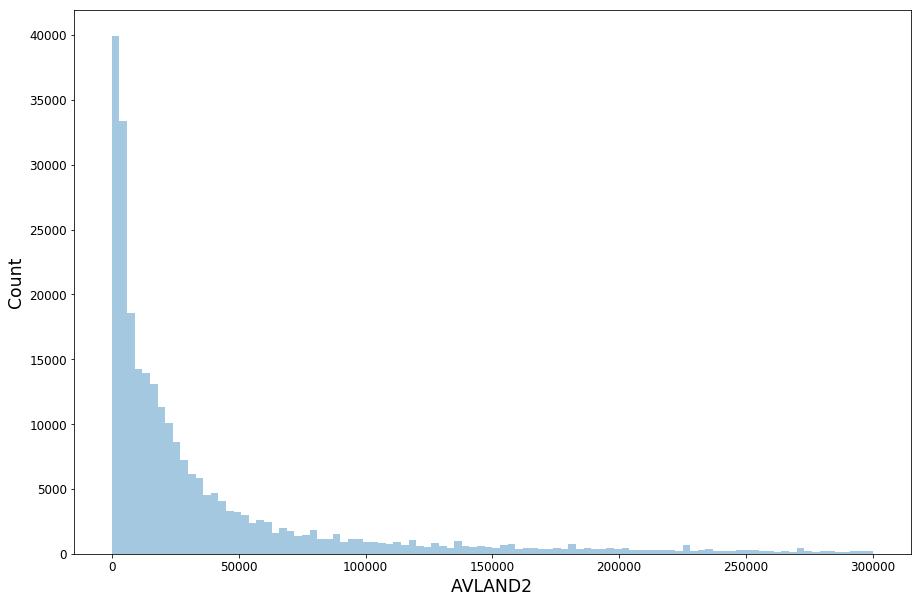

In [159]:
xhigh = 300000
temp = mydata[mydata['AVLAND2'] <= xhigh]
temp.count()
sns.distplot(temp['AVLAND2'],bins= 100, kde=False)

plt.xlabel('AVLAND2')
plt.ylabel('Count')
plt.savefig('25AVLAND2.png',bbox_inches='tight')

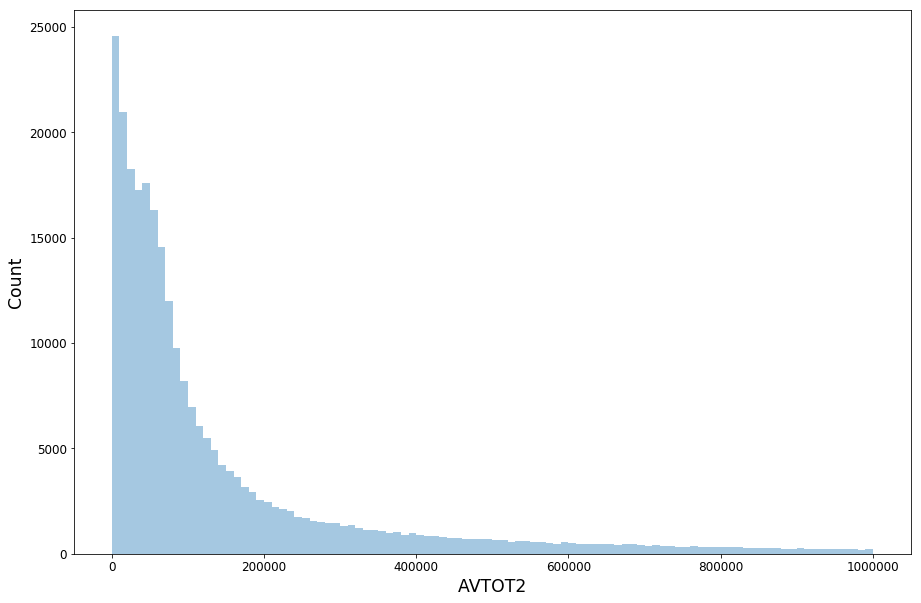

In [166]:
xhigh = 1000000
temp = mydata[mydata['AVTOT2'] <= xhigh]
temp.count()
sns.distplot(temp['AVTOT2'],bins= 100, kde=False)
plt.xlabel('AVTOT2')
plt.ylabel('Count')
plt.savefig('26AVTOT2.png',bbox_inches='tight')

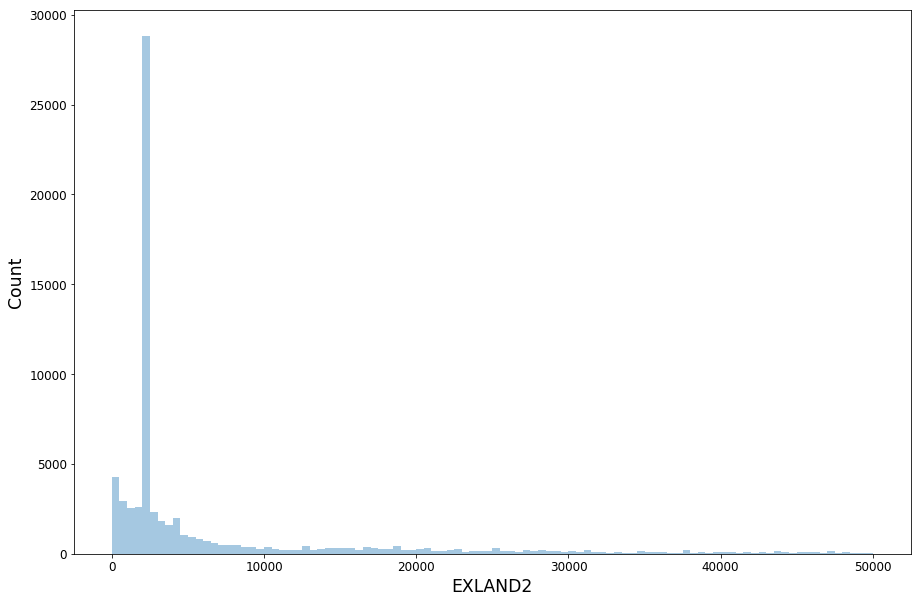

In [168]:
xhigh = 50000
temp = mydata[mydata['EXLAND2'] <= xhigh]
temp.count()
sns.distplot(temp['EXLAND2'],bins= 100, kde= False)

plt.xlabel('EXLAND2')
plt.ylabel('Count')
plt.savefig('27EXLAND2.png',bbox_inches='tight')

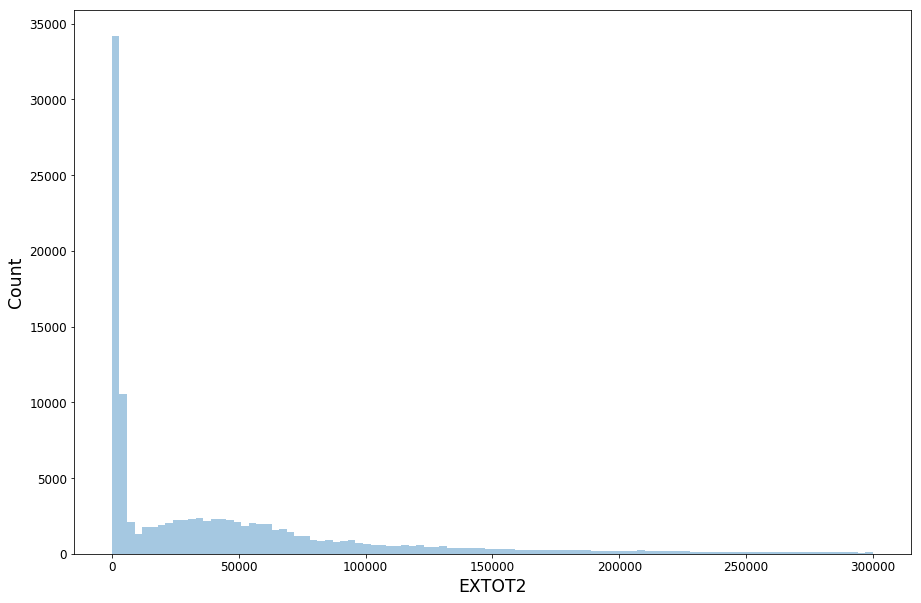

In [171]:
xhigh = 300000
temp = mydata[mydata['EXTOT2'] <= xhigh]
temp.count()
sns.distplot(temp['EXTOT2'],bins= 100, kde=False)

plt.xlabel('EXTOT2')
plt.ylabel('Count')
plt.savefig('28EXTOT2.png',bbox_inches='tight')

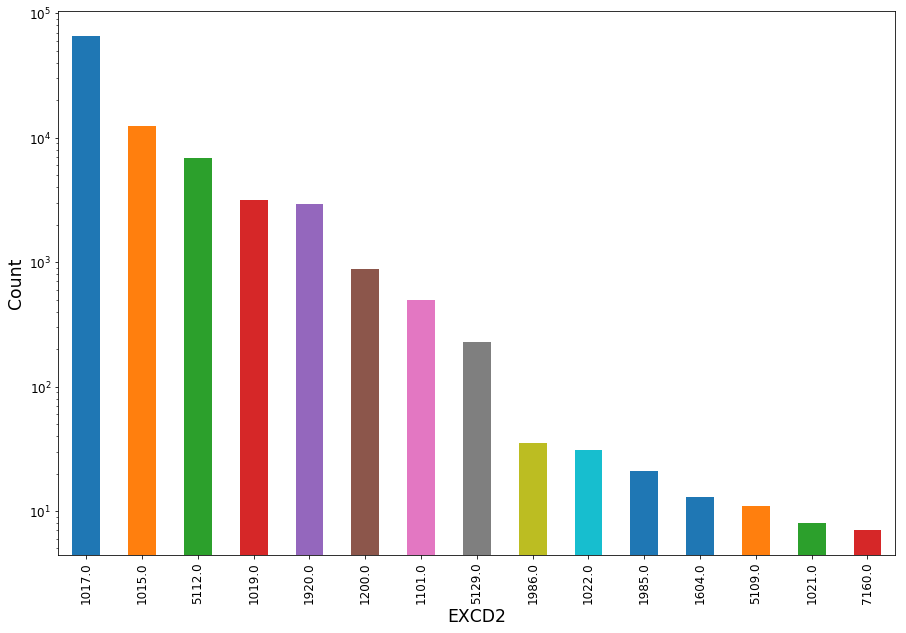

In [203]:
mydata['EXCD2'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')
plt.xlabel('EXCD2')
plt.ylabel('Count')
plt.savefig('29EXCD2.png',bbox_inches='tight')
plt.show()

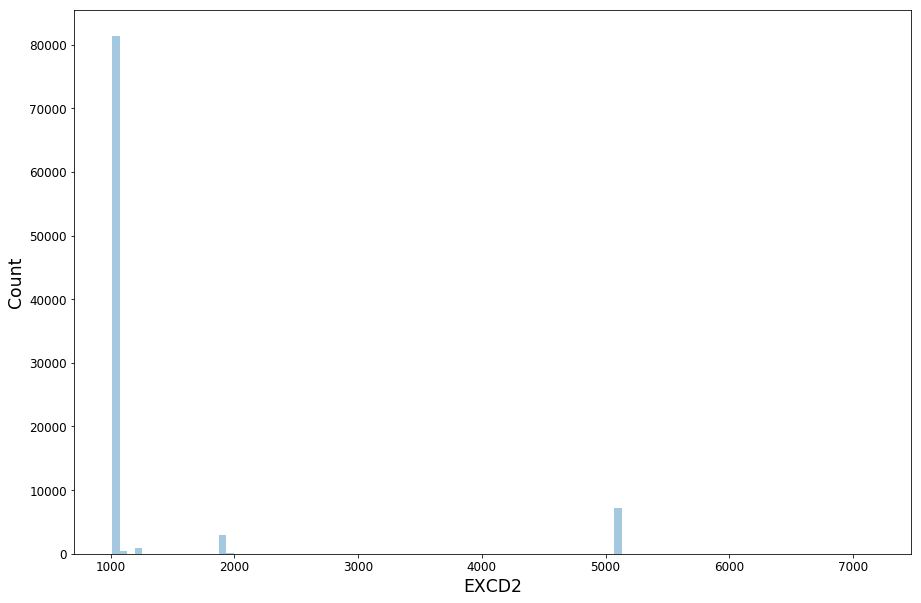

In [172]:
xhigh = 8000
temp = mydata[mydata['EXCD2'] <= xhigh]
temp.count()
sns.distplot(temp['EXCD2'],bins= 100, kde=False)

plt.xlabel('EXCD2')
plt.ylabel('Count')
plt.savefig('29EXCD2.png',bbox_inches='tight')

In [194]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

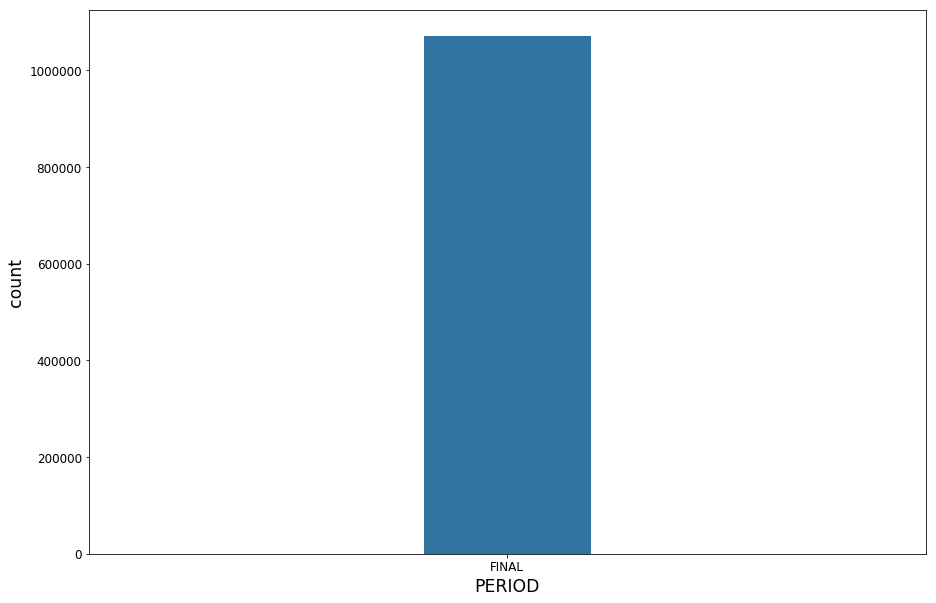

In [195]:
plot = sns.countplot(x='PERIOD', data = mydata)
plt.xlim(-2, 2)
plt.savefig('30PERIOD.png')
plt.show()

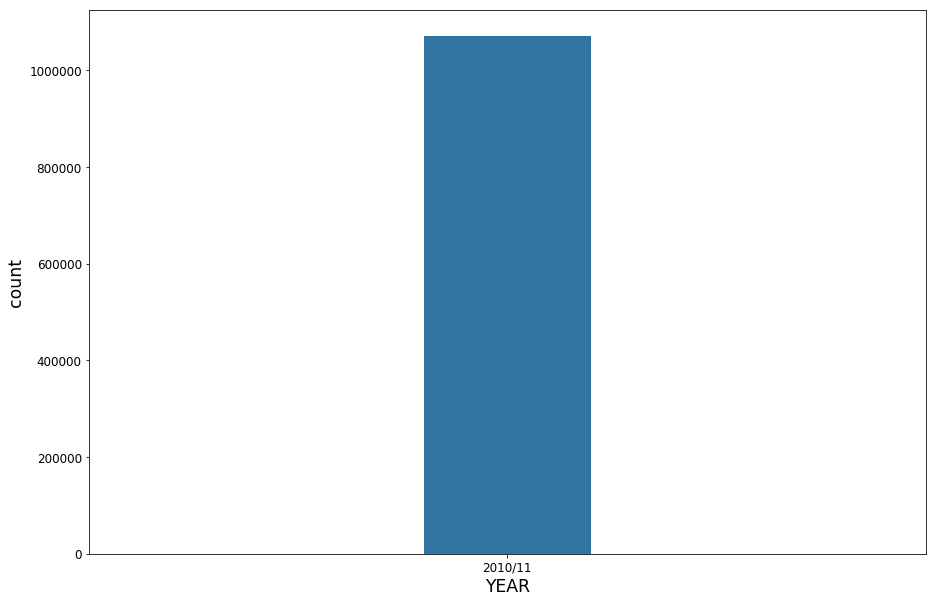

In [196]:
plot = sns.countplot(x='YEAR', data = mydata)
plt.xlim(-2, 2)
plt.savefig('31YEAR.png')
plt.show()

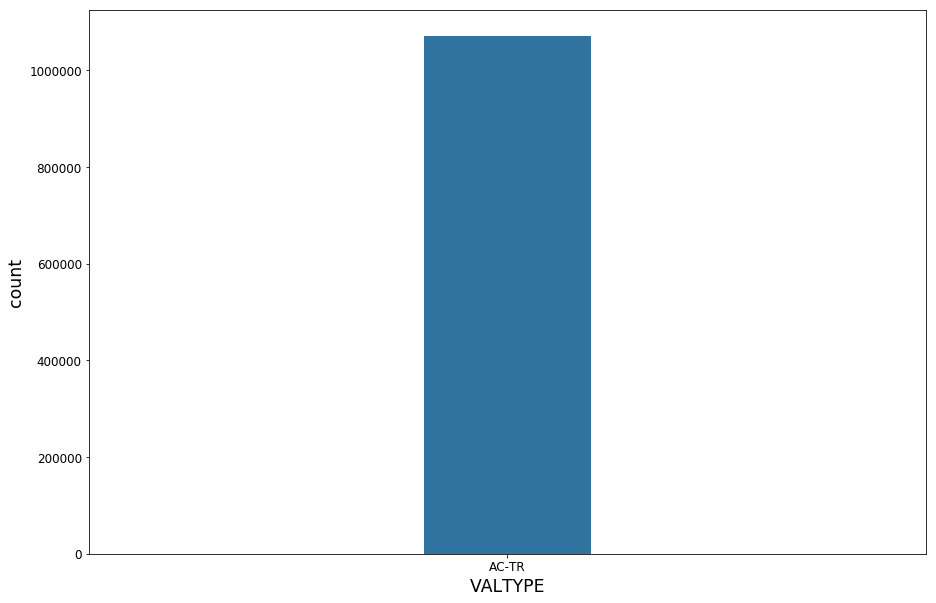

In [197]:
plot = sns.countplot(x='VALTYPE', data = mydata)
plt.xlim(-2, 2)
plt.savefig('32VALTYPE.png')
plt.show()